In [22]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import seaborn as sns


In [17]:
df =  pd.read_csv('Cleaned_Data.csv')
df = df.drop(columns=['AgeRange'])
df = pd.get_dummies(df, columns=['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking','DEATH_EVENT'], dtype=int, drop_first=True)
X = df.drop(columns='DEATH_EVENT_True')
y = df['DEATH_EVENT_True']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=16)
X_train.head(3)

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,anaemia_True,diabetes_True,high_blood_pressure_True,sex_True,smoking_True
203,60,59,25,212000.0,3.5,136,187,0,0,1,1,1
186,50,582,50,153000.0,0.6,134,172,0,0,0,0,0
21,65,128,30,297000.0,1.6,136,20,1,1,1,0,0


In [18]:
model = LogisticRegression(random_state=16)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model_p = sm.Logit(y_train, X_train).fit()
model_p.summary()

Optimization terminated successfully.
         Current function value: 0.391533
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       DEATH_EVENT_True   No. Observations:                  239
Model:                          Logit   Df Residuals:                      227
Method:                           MLE   Df Model:                           11
Date:                Thu, 25 Jan 2024   Pseudo R-squ.:                  0.3830
Time:                        20:10:07   Log-Likelihood:                -93.576
converged:                       True   LL-Null:                       -151.66
Covariance Type:            nonrobust   LLR p-value:                 1.067e-19
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
age                          0.0539      0.018      3.065      0.002       0.019       0.088
creatinine_phosphokinase     0.0003      0.000      1.433      0.152      -0.000       0.001
ejection_fraction           -0.0796      0.018     -4.346      0.000      -0.116      -0.044
platelets                -2.523e-06   2.08e-06     -1.212      0.225    -6.6e-06    1.56e-06
serum_creatinine             0.6990      0.186      3.756      0.000       0.334       1.064
serum_sodium                 0.0060      0.010      0.593      0.553      -0.014       0.026
time                        -0.0196      0.003     -6.026      0.000      -0.026      -0.013
anaemia_True                -0.0516      0.381     -0.135      0.892      -0.799       0.695
diabetes_True                0.1530      0.380      0.403      0.687      -0.591       0.897
high_blood_pressure_True     0.0023      0.384      0.006      0.995      -0.750       0.755
sex_True                    -0.5765      0.439     -1.312      0.189      -1.438       0.285
smoking_True                 0.0996      0.444      0.225      0.822      -0.770       0.969
============================================================================================
"""

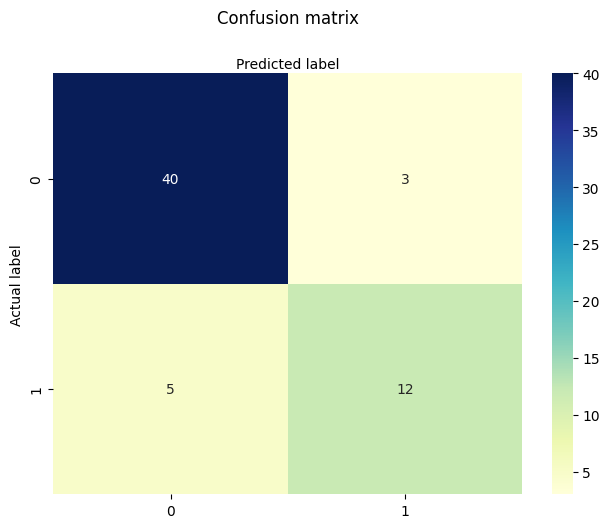

              precision    recall  f1-score   support

    survived       0.89      0.93      0.91        43
    deceased       0.80      0.71      0.75        17

    accuracy                           0.87        60
   macro avg       0.84      0.82      0.83        60
weighted avg       0.86      0.87      0.86        60



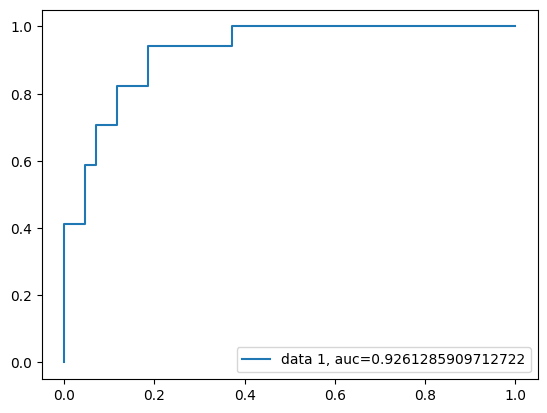

In [25]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()
target_names = ['survived', 'deceased']
print(classification_report(y_test, y_pred, target_names=target_names))


y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()